1. Data Exploration and Preprocessing

In [30]:
# loding the blogs dataset
import pandas as pd
df = pd.read_csv('blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [31]:
# summarizing the data and checking null values
display(df.shape)
display(df.info())
display(df.describe())
display(df.isnull().sum())

(2000, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


None

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


,0
Data,0
Labels,0


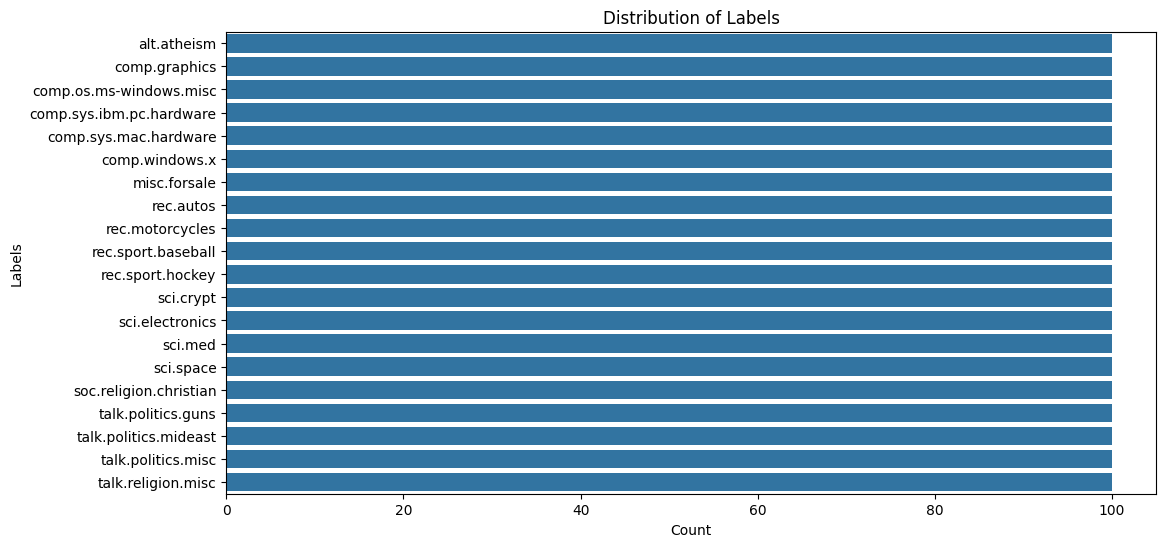

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='Labels', data=df, order = df['Labels'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [33]:
# Preprocessing the data by cleaning the text
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['cleaned_data'] = df['Data'].apply(clean_text)
display(df.head())

,Data,Labels,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...


In [34]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['cleaned_data'].apply(tokenize_text)
display(df.head())

,Data,Labels,cleaned_data,tokens
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk..."


In [37]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
display(df.head())

,Data,Labels,cleaned_data,tokens
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk..."


In [38]:
import nltk
from nltk.stem import PorterStemmer

# Download the 'porter' stemmer
try:
    nltk.download('porter', quiet=True)
except LookupError:
    print("Could not download 'porter' stemmer. Please try running `nltk.download('porter')` in a separate cell.")


stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['tokens'] = df['tokens'].apply(stem_tokens)
display(df.head())

[nltk_data] Error loading porter: Package 'porter' not found in index


,Data,Labels,cleaned_data,tokens
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroup, altath, path, cantaloupesrvcscmued..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altath, talkreli..."


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into a string for TF-IDF
df['text_for_tfidf'] = df['tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_for_tfidf'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (2000, 5000)


2. Naive Bayes Model for Text Classification

In [40]:
# splitting the data set into traing and testing data
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 5000)
Shape of X_test: (400, 5000)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [41]:
# Implementing a Naive Bayes classifier to categorize the blog posts into their respective categories.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
naive_bayes_model = MultinomialNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.84      0.89      0.86        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.77      0.81      0.79        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94 

3. Sentiment Analysis

I Prefer Using VADER Sentiment due to

- **Tuned for Online Text:**  
  Designed for social media and blogs, it handles slang, emojis, punctuation, and capitalization effectively.

- **Lexicon + Rule-Based:**  
  Uses a dictionary of sentiment words and rules to capture context and intensity.

- **Understands Language Nuances:**  
  Handles negations (e.g., *not happy*), intensifiers (e.g., *very good*), and punctuation emphasis (e.g., *great!!!*).

- **Compound Score:**  
  Provides a single, normalized score that summarizes overall sentiment, making results easy to interpret.

- **No Training Data Needed:**  
  Works out-of-the-box without requiring labeled datasets, making it fast and convenient.


In [42]:
# Choose a suitable library or method for performing sentiment analysis
!pip install vaderSentiment

In [43]:
# analyzing the sentiments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    # VADER provides a compound score which is a normalized, weighted composite score
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['Data'].apply(get_sentiment)
display(df.head())

,Data,Labels,cleaned_data,tokens,text_for_tfidf,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroup, altath, path, cantaloupesrvcscmued...",newsgroup altath path cantaloupesrvcscmueducra...,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altath, talkreli...",xref cantaloupesrvcscmuedu altath talkreligion...,Positive


In [44]:
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack(fill_value=0)
display(sentiment_distribution)

sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,41,1,58
comp.graphics,11,2,87
comp.os.ms-windows.misc,21,2,77
comp.sys.ibm.pc.hardware,18,1,81
comp.sys.mac.hardware,24,4,72
comp.windows.x,18,2,80
misc.forsale,8,8,84
rec.autos,27,0,73
rec.motorcycles,30,1,69


### Sentiment Analysis Summary

- **Positive Sentiment:**  
  Most categories have more positive posts than negative or neutral.  
  Strongly positive categories include:  
  - comp.graphics  
  - comp.os.ms-windows.misc  
  - comp.sys.ibm.pc.hardware  
  - comp.windows.x  
  - misc.forsale  
  - rec.autos  
  - rec.motorcycles  
  - rec.sport.baseball  
  - rec.sport.hockey  
  - sci.crypt  
  - sci.electronics  
  - sci.med  
  - sci.space  

- **Negative Sentiment:**  
  - talk.politics.guns and talk.politics.mideast show a **dominant negative sentiment**.  
  - talk.politics.misc and alt.atheism also lean negative, though less strongly.  

- **Neutral Sentiment:**  
  Neutral posts are generally **low across all categories**.  

### Overall
The analysis shows clear variations in sentiment across categories—some topics naturally attract more **positive** discussions, while political and controversial topics tend to attract more **negative** sentiment.



4. Evaluation

## Naive Bayes Classifier Performance

- **Overall Accuracy:** 0.795 (≈79.5% correct classifications).  
- **Strong Categories (high precision & recall):**  
  - comp.windows.x  
  - rec.autos  
  - rec.motorcycles  
  - rec.sport.hockey  
  - sci.crypt  
  - soc.religion.christian  
- **Weaker Categories (lower precision/recall):**  
  - alt.atheism  
  - sci.electronics  
  - talk.politics.guns  
  - talk.politics.misc  
  - talk.religion.misc  

### Challenges in Classification
- **Text Complexity:** Informal language, jargon, and slang reduce accuracy.  
- **Category Overlap:** Some categories share themes, making them harder to distinguish.  
- **Data Imbalance:** Minor imbalances affect classification of specific labels.  

## Sentiment Analysis Reflection
- **Negative Sentiment:** Strong in political/controversial categories (e.g., talk.politics.guns, talk.politics.mideast).  
- **Positive Sentiment:** Dominant in technical and recreational categories.  
- **Neutral Sentiment:** Very few posts are neutral; most are clearly positive or negative.  

## Implications
- Naive Bayes is a **good baseline** but has weaknesses in some categories.  
- Sentiment analysis provides valuable context:
  - Helps explain discussion tone in different communities.  
  - Could be used to **enhance classification models** by adding sentiment as a feature.  

**In summary:**  
Naive Bayes performs reasonably well but can be improved. Sentiment insights add depth to understanding the dataset and can support better classification in the future.
